# First step : a single neuron network

This example is a first example of artificial neural network. For now, one single neuron will be used to classify two classes of dots in the xy plane, according to their 2D 
spatial coordinates.

Here we define the training data set where the two classes are simply defined by points above or below a straight line:

$(Y<aX+b)$ 

or 

$(Y>aX+b)$.

The size (i.e. the number of xy points) of the Training data set can be set. On top of it a Validation data set and a Testing data set are also defined. The xy position of the points is defined randomly, and each point belongs to one class, determined by its position with respect to the line, and indicated by its color.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
    
def Training_set_linear(a,b,Ntrain,Nval,Ntest):
    
    n = 0
    N = Ntrain+Nval+Ntest
    Data = np.zeros([N,2])
    Labels = np.zeros([N,1])
      
    for n in range(0,N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        Data[n,0] = x
        Data[n,1] = y
        
        if y < a*x+b :
            Labels[n,0] = 1
        else : 
            Labels[n,0] = 0

    Training_data = Data[:Ntrain,]
    Training_label = Labels[:Ntrain,]
    Validation_data = Data[Ntrain+1:Ntrain+Nval,]
    Validation_label = Labels[Ntrain+1:Ntrain+Nval,]
    Testing_data = Data[Ntrain+Nval+1:N:,]
    Testing_label = Labels[Ntrain+Nval+1:N:,]
        
    return Training_data, Testing_data, Validation_data, Training_label, Validation_label, Testing_label
 

The actual training/validation/testing sets are defined below. Try different Ntrain (100, 500, 1000, ...), the number of training points. You will see why "deep learning" requires lots of data.

In [2]:
a = 0.5
b = 0.1
Ntrain = 100 
Nval = 50
Ntest = 50
    
Training_data, Testing_data, Validation_data, Training_label, Validation_label, Testing_label = Training_set_linear(a,b,Ntrain,Nval,Ntest) 
    

The training set is then plot using two different colors
to distinguish the two classes

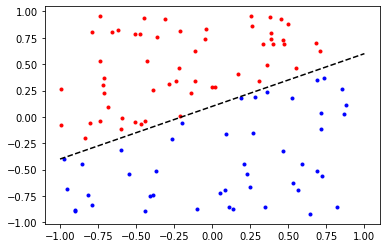

In [3]:
Idx_class_0 = Training_label==0
Idx_class_1 = Training_label==1

X0 = Training_data[Idx_class_0[:,0],0]
Y0 = Training_data[Idx_class_0[:,0],1]
X1 = Training_data[Idx_class_1[:,0],0]
Y1 = Training_data[Idx_class_1[:,0],1]

X = np.array([-1,1])
Y = a*X + b  
        
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.plot(X,Y,'--k')
plt.show()


Define the architecture of the model. Here only one neuron is used with two inputs : the X and Y coordinates of each point of the train set. 
Since we are working with two classes, the activation function is "`sigmoid`", so the output (in 0,1)  will be the probability of the point to belong to one class.
The loss function compares the model output with the expected output, and `binary_crossentropy` is used when classifing only two classes. In the end the distinction between the two classes will be made on the base of whether the output will be below or above 0.5 .

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1,activation='sigmoid', input_shape=(2,)))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Here we train the model. We send a batch of points to the model, which gives its predictions, and then corrects its weights trying to minimize the loss function. 
When all the training points have been used, an epoch is done, and a new epoch can start again. The number of epochs can be defined below. The results at each iteraction
are saved in order to compare the accuracy calculated for the training set and for the validation set. These data are saved in the variable "history", which will be used later.

In [5]:
history = model.fit(Training_data,
                    Training_label,
                    epochs = 200,
                    batch_size = 4,
                    validation_data = (Validation_data, Validation_label))

Epoch 1/200
25/25 [==============================] - 1s 7ms/step - loss: 0.5377 - accuracy: 0.8300 - val_loss: 0.4962 - val_accuracy: 0.8571
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.8500 - val_loss: 0.4921 - val_accuracy: 0.8571
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8500 - val_loss: 0.4882 - val_accuracy: 0.8571
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8500 - val_loss: 0.4844 - val_accuracy: 0.8776
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.8500 - val_loss: 0.4805 - val_accuracy: 0.8776
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8500 - val_loss: 0.4767 - val_accuracy: 0.8776
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8600 - val_loss: 0.4731 - val_accuracy: 0.8776
Epoch 8/200
2

Once trained, the accuracy of the model is calculated using the testing set of data. Here we plot the predictions of the model over testing points it has never seen before


2/2 [==============================] - 0s 4ms/step


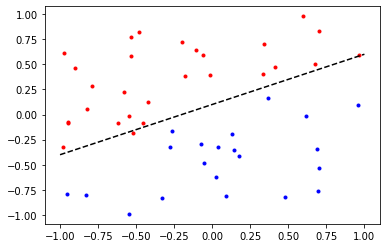

In [6]:
Results = model.predict(Testing_data)

Idx_class_0 = Results < 0.5
Idx_class_1 = Results >= 0.5

X0 = Testing_data[Idx_class_0[:,0],0]
Y0 = Testing_data[Idx_class_0[:,0],1]
X1 = Testing_data[Idx_class_1[:,0],0]
Y1 = Testing_data[Idx_class_1[:,0],1]

X = np.array([-1,1])
Y = a*X + b        
        
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.plot(X,Y,'--k')
plt.show() 

In the same way, using the "model.evaluate" function you can test the accuracy of the model when working on the testing set. The second number returns the average accuracy.


In [7]:
Predication_accuracy = model.evaluate(Testing_data, Testing_label)

2/2 [==============================] - 0s 4ms/step - loss: 0.2093 - accuracy: 0.9796


Below the accuracy for the training and validation sets are plotted

In [ ]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

n = len(acc_values)
epochs = range(1, n+1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Below the validation loss for the training and validation sets are plotted

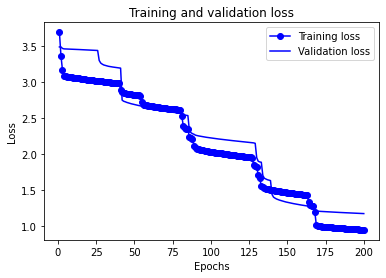

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, '-bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Here we define a test set on a regular grid, so we can see more clearly how the real line that separates the two classes comapres with the predictions

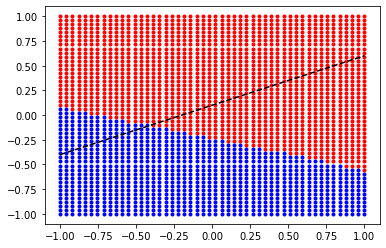

In [ ]:
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

Test = np.vstack((X,Y))
Test = np.transpose(Test)
Results = model.predict(Test)

Idx_class_0 = Results<0.5
Idx_class_1 = Results>=0.5

X0 = Test[Idx_class_0[:,0],0]
Y0 = Test[Idx_class_0[:,0],1]
X1 = Test[Idx_class_1[:,0],0]
Y1 = Test[Idx_class_1[:,0],1]

X = np.array([-1,1])
Y = a*X + b        
        
plt.plot(X0, Y0, 'r.')
plt.plot(X1, Y1, 'b.')
plt.plot(X,Y,'--k')
plt.show() 


Now go back and change the **number of points** in the training set, and see how the model performs with more or less training data.
Also, change and see the effects of the **batch_size** in the training fit function, and of the **number of epochs**. Is the separation between the blue and red points always a straight line?